In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Get the Data

** Use pandas to read loan_data.csv as a dataframe called loans.**

In [3]:
loans = pd.read_csv("loan_data.csv")
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


** Check out the info(), head(), and describe() methods on loans.**

In [4]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [5]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


Exploratory Data Analysis

** Create a histogram of two FICO distributions on top of each other, one for each credit.policy outcome.**

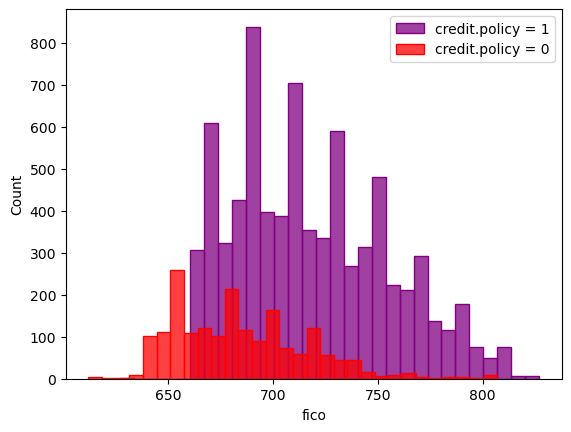

In [22]:
sns.histplot(loans[loans['credit.policy'] == 1]['fico'], bins=30, color='purple', edgecolor='purple')
sns.histplot(loans[loans['credit.policy'] == 0]['fico'], bins=30, color='red', edgecolor='red')
plt.legend(labels=["credit.policy = 1","credit.policy = 0"])

** Create a similar figure, except this time select by the not.fully.paid column.**

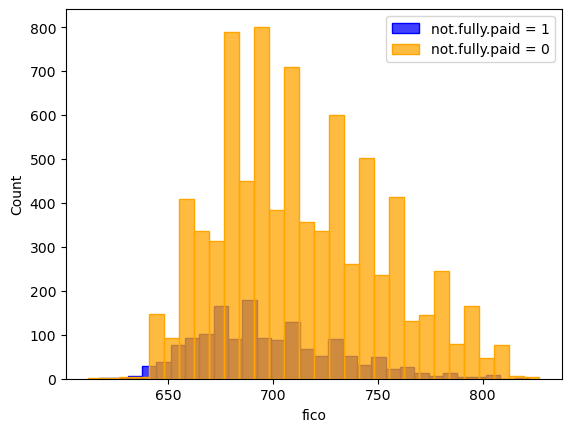

In [21]:
sns.histplot(loans[loans['not.fully.paid'] == 1]['fico'], bins=30, color='blue', edgecolor='blue')
sns.histplot(loans[loans['not.fully.paid'] == 0]['fico'], bins=30, color='orange', edgecolor='orange')
plt.legend(labels=["not.fully.paid = 1","not.fully.paid = 0"])

** Create a countplot using seaborn showing the counts of loans by purpose, with the color hue defined by not.fully.paid. **

<Axes: xlabel='purpose', ylabel='count'>

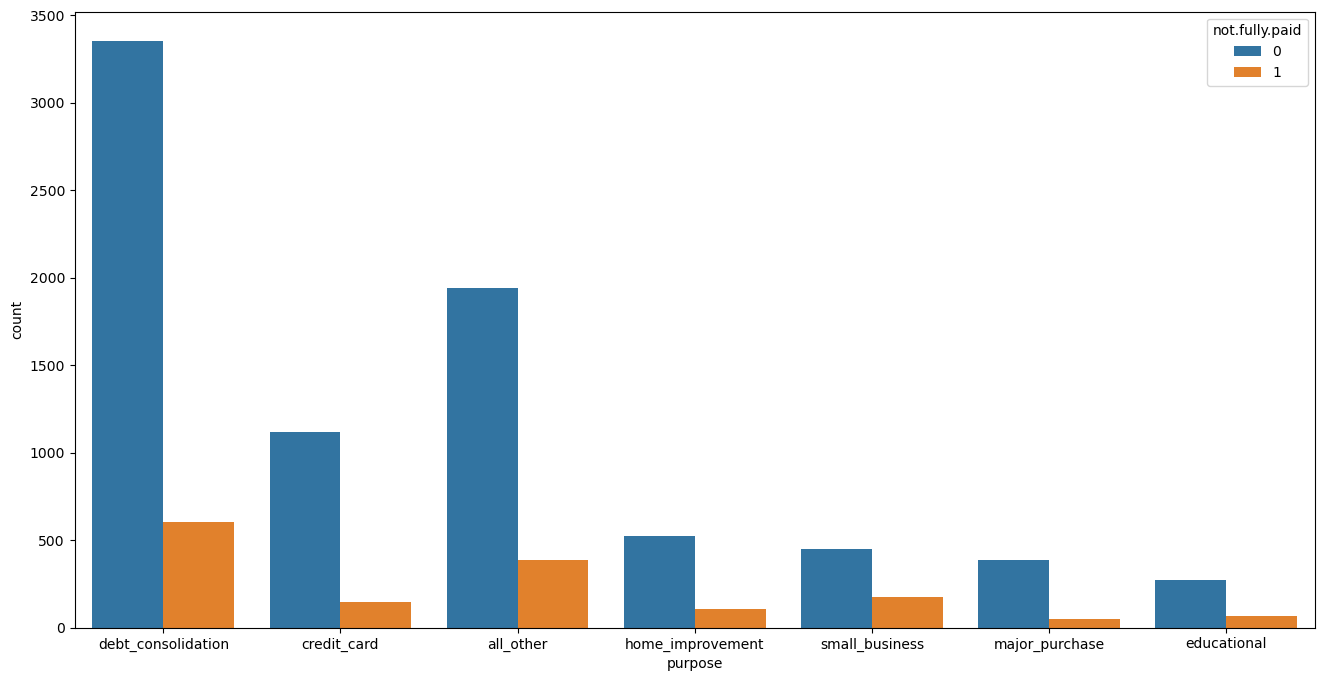

In [29]:
plt.figure(figsize=(16,8))
sns.countplot(data=loans, x='purpose', hue='not.fully.paid')

** Let's see the trend between FICO score and interest rate. Recreate the following jointplot.**

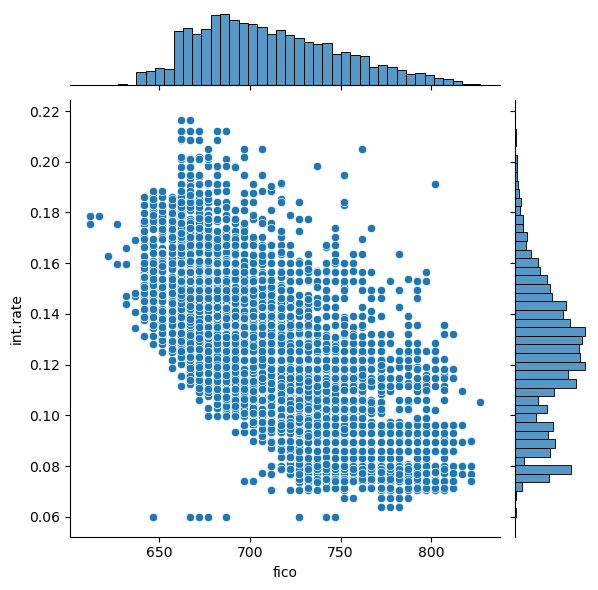

In [30]:
sns.jointplot(data=loans, x='fico', y='int.rate')

** Create the following lmplots to see if the trend differed between not.fully.paid and credit.policy. Check the documentation for lmplot() if you can't figure out how to separate it into columns.**

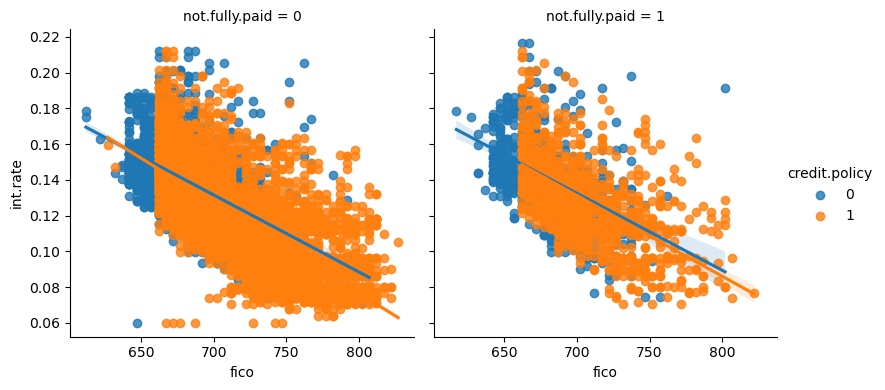

In [31]:
sns.lmplot(
    data=loans, x="fico", y="int.rate",
    hue="credit.policy", col="not.fully.paid", height=4,
)

Categorical Features

Notice that the purpose column as categorical

In [36]:
cat_feats = ['purpose']
final_data = pd.get_dummies(loans, columns=cat_feats, drop_first=True)

In [37]:
final_data

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1,0,0,0,0,0,0
9574,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1,0,0,0,0,0,0
9575,0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1,0,1,0,0,0,0
9576,0,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1,0,0,0,1,0,0


In [38]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

Train Test Split

Now its time to split our data into a training set and a testing set!

** Use sklearn to split your data into a training set and a testing set as we've done in the past.**

In [39]:
from sklearn.model_selection import train_test_split

In [41]:
X = final_data.drop('not.fully.paid', axis=1)
y = final_data['not.fully.paid']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

Training a Decision Tree Model

Let's start by training a single decision tree first!

** Import DecisionTreeClassifier*

In [43]:
from sklearn.tree import DecisionTreeClassifier

In [44]:
dtree = DecisionTreeClassifier()

In [45]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

Predictions and Evaluation of Decision Tree

Create predictions from the test set and create a classification report and a confusion matrix.

In [47]:
X_test

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
2195,1,0.0963,385.14,11.350407,22.11,752,5550.000000,13073,16.5,0,0,0,0,0,0,0,0,1
2496,1,0.1411,308.06,10.858999,24.92,687,3240.000000,28336,86.9,0,0,0,0,1,0,0,0,0
4551,1,0.1531,696.31,11.446786,23.79,702,4410.000000,59980,95.5,0,0,0,0,1,0,0,0,0
1373,1,0.1557,244.62,10.933107,1.18,672,1409.958333,255,15.0,2,0,0,0,0,0,0,0,1
8268,0,0.1197,481.40,11.775290,10.85,682,5071.000000,966,13.1,5,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785,1,0.1039,324.51,11.232616,12.88,707,2939.958333,10689,18.4,3,0,0,0,1,0,0,0,0
1196,1,0.1191,185.76,10.146434,2.68,677,1740.000000,4885,35.4,2,0,0,0,0,0,0,1,0
5411,1,0.0894,413.03,10.861458,18.99,747,3209.958333,14385,50.3,1,0,0,1,0,0,0,0,0
3583,1,0.1379,340.76,10.518673,18.16,682,6659.958333,17473,47.9,0,0,0,0,1,0,0,0,0


In [48]:
predictions = dtree.predict(X_test)
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [49]:
from sklearn.metrics import classification_report,confusion_matrix

In [50]:
y_test.value_counts()

0    2429
1     445
Name: not.fully.paid, dtype: int64

In [52]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84      2429
           1       0.21      0.24      0.22       445

    accuracy                           0.74      2874
   macro avg       0.53      0.54      0.53      2874
weighted avg       0.76      0.74      0.75      2874



In [53]:
print(confusion_matrix(y_test,predictions))

[[2018  411]
 [ 337  108]]


Training the Random Forest model

Now its time to train our model!

Create an instance of the RandomForestClassifier class and fit it to our training data from the previous step.

In [54]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [55]:
rfc_pred = rfc.predict(X_test)

In [56]:
print(confusion_matrix(y_test,rfc_pred))


[[2418   11]
 [ 434   11]]


In [57]:
print(classification_report(y_test,rfc_pred))


              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2429
           1       0.50      0.02      0.05       445

    accuracy                           0.85      2874
   macro avg       0.67      0.51      0.48      2874
weighted avg       0.79      0.85      0.78      2874

